In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/file_dataframe.csv')
df.head()

,file_path,category
0,../data/raw/AID/Pond/pond_251.jpg,Pond
1,../data/raw/AID/Pond/pond_245.jpg,Pond
2,../data/raw/AID/Pond/pond_24.jpg,Pond
3,../data/raw/AID/Pond/pond_30.jpg,Pond
4,../data/raw/AID/Pond/pond_18.jpg,Pond


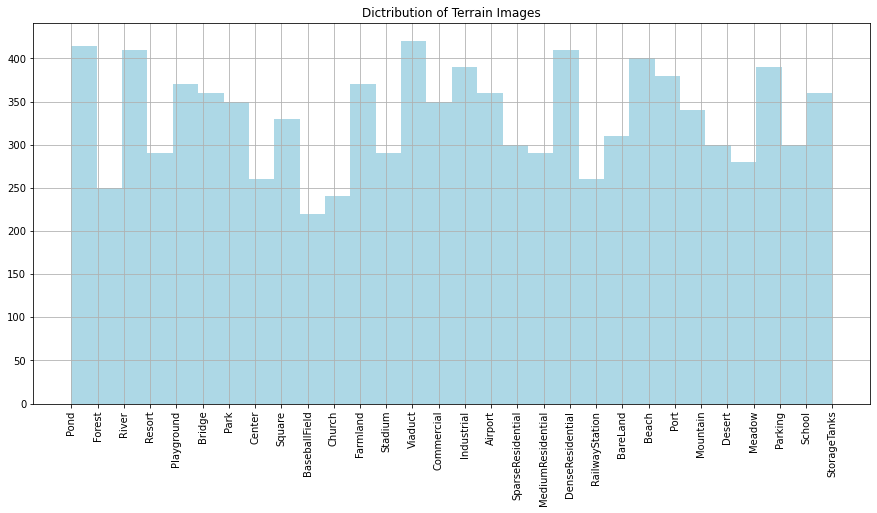

In [4]:
fig = plt.figure(figsize = (15,7))
ax = fig.gca()
plt.title('Dictribution of Terrain Images')
df['category'].hist(color = 'lightblue', bins = 30, ax = ax)
plt.xticks(rotation=90);
#plt.savefig('distribution.png', bbox_inches='tight');

In [506]:
path = df['file_path'][6000]#'../data/raw/AID/Pond/pond_132.jpg'
im = cv2.imread(path)
print(path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

../data/raw/AID/MediumResidential/mediumresidential_244.jpg


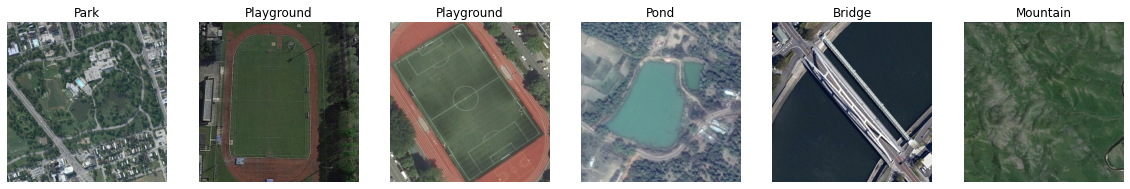

In [605]:
import PIL
rows = 2
files = random.sample(list(df['file_path']), 6)
fig = plt.figure(figsize=(20, 10))
for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.title(x.split('/')[-2])
    plt.axis('off')
    plt.imshow(img)
#plt.savefig('random_terrain.png', bbox_inches='tight')

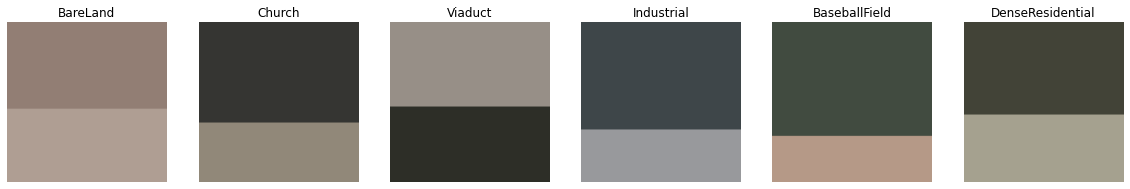

In [614]:
#this was mostly take from the internet, cannot find original post. Sorry no credit
rand_files = random.sample(list(df['file_path']), 6)
fig = plt.figure(figsize=(20, 10))
fig_rows = 1
fig_columns = 6
titles = []
dom_images = []
for i, rf in enumerate(rand_files):
    im = cv2.imread(rf)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    pixels = np.float32(im.reshape(-1, 3))
    n_colors = 2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)
    dominant = palette[np.argmax(counts)]
    indices = np.argsort(counts)[::-1]   
    freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
    rows = np.int_(im.shape[0]*freqs)

    dom_patch = np.zeros(shape=im.shape, dtype=np.uint8)
    for i in range(len(rows) - 1):
        dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    titles.append(rf.split('/')[-2])
    dom_images.append(dom_patch)

fig.add_subplot(fig_rows, fig_columns, 1)
plt.title(titles[0])
plt.axis('off')
plt.imshow(dom_images[0])
fig.add_subplot(fig_rows, fig_columns, 2)
plt.title(titles[1])
plt.axis('off')
plt.imshow(dom_images[1])
fig.add_subplot(fig_rows, fig_columns, 3)
plt.title(titles[2])
plt.axis('off')
plt.imshow(dom_images[2])
fig.add_subplot(fig_rows, fig_columns, 4)
plt.title(titles[3])
plt.axis('off')
plt.imshow(dom_images[3])
fig.add_subplot(fig_rows, fig_columns, 5)
plt.title(titles[4])
plt.axis('off')
plt.imshow(dom_images[4])
fig.add_subplot(fig_rows, fig_columns, 6)
plt.title(titles[5])
plt.axis('off')
plt.imshow(dom_images[5])
#plt.savefig('dominant_colors.png', bbox_inches='tight');

In [542]:
pixels = np.float32(im.reshape(-1, 3))
n_colors = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS
_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
dominant = palette[np.argmax(counts)]

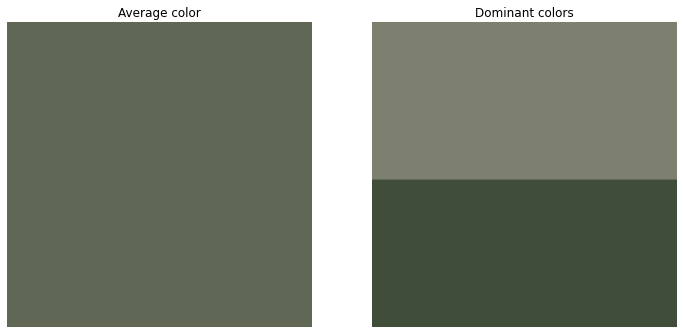

In [527]:
avg_patch = np.ones(shape=im.shape, dtype=np.uint8)*np.uint8(average)
indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(im.shape[0]*freqs)

dom_patch = np.zeros(shape=im.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

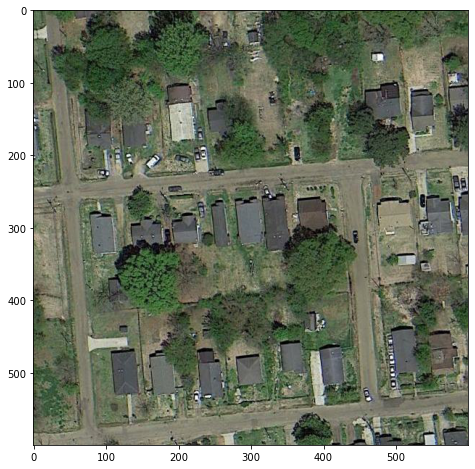

In [510]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

In [163]:
sample_size = 50
epoch = 1000
avgs_dict = dict()
for c in df.category.unique():
    epoch_avgs = []
    for i in range(epoch):
        avgs = []
        sample_files = df.query('category == "{}"' .format(c))['file_path'].sample(sample_size)
        for f in sample_files:
            im = cv2.imread(f)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            avgs.append(sum(im.mean(axis=0))/600)
        avg_dict[c] = avgs
        epoch_avgs.append(np.mean(avgs, axis=tuple(range(1))))
    avgs_dict[c] = epoch_avgs

In [230]:
kv_pairs = []
for k in avgs_dict.keys():
    for v in avgs_dict[k]:
        kv_pairs.append([k, v[0], v[1], v[2]])
kv_df = pd.DataFrame(kv_pairs, columns = ['category', 'r', 'g', 'b']) 
kv_df.head()

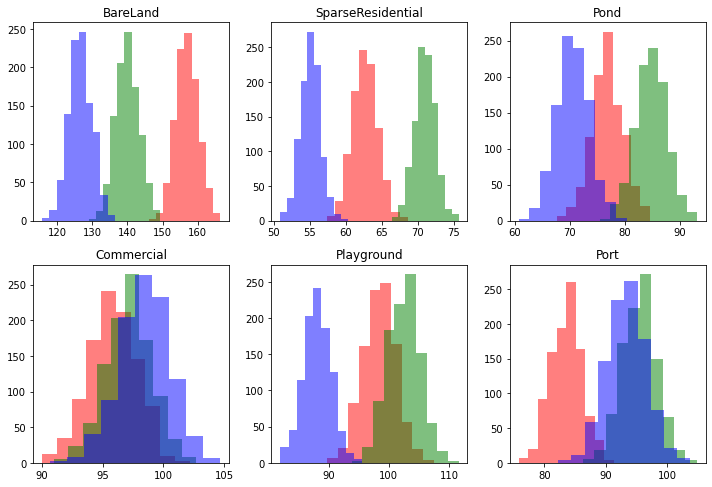

<Figure size 432x288 with 0 Axes>

In [602]:
#draw random sample of 6, 30 are too many to visualize
sample_terrains = random.sample(list(kv_df['category'].unique()), 6)
def draw_histograms(sample, n_rows, n_cols):
    fig=plt.figure(figsize = (10,10));
    for n, s in enumerate(sample_terrains):
        r = np.array(avgs_dict['{}' .format(s)])[:, 0]
        g = np.array(avgs_dict['{}' .format(s)])[:, 1]
        b = np.array(avgs_dict['{}' .format(s)])[:, 2]
        ax=fig.add_subplot(n_rows,n_cols,n+1)
        plt.hist(r, alpha=0.5, color = 'red')
        plt.hist(g, alpha=0.5, color = 'green')
        plt.hist(b, alpha=0.5, color = 'blue')
        plt.title(s)
    fig.tight_layout()
    plt.show();
draw_histograms(sample_terrains, 3, 3);
#plt.savefig('random_rgb_means.png');

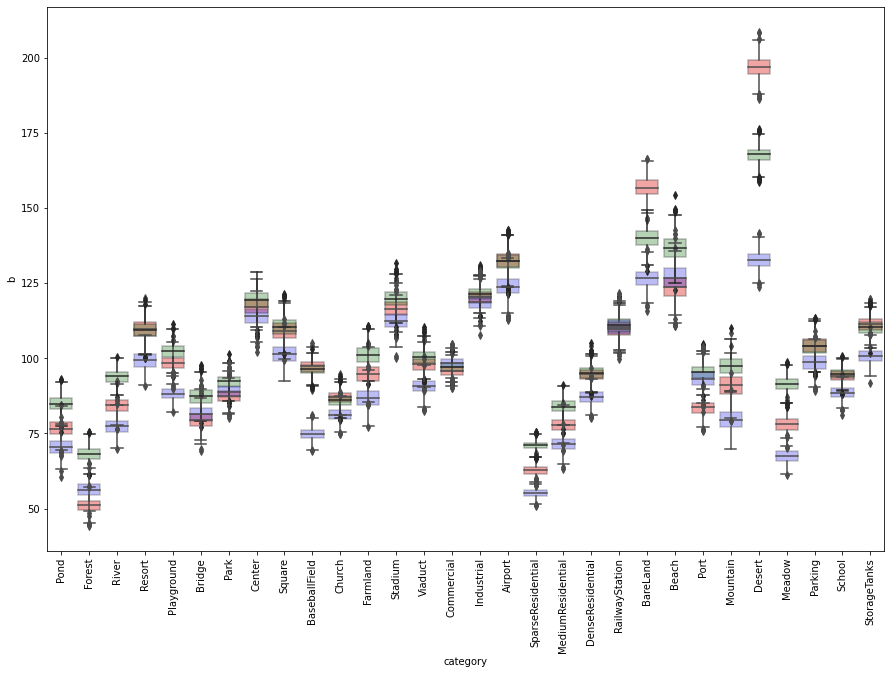

In [613]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x= 'category', y= 'r', data = kv_df, color = 'r', boxprops=dict(alpha=.4))
ax = sns.boxplot(x= 'category', y= 'g', data = kv_df, color = 'g', boxprops=dict(alpha=.3))
ax = sns.boxplot(x= 'category', y= 'b', data = kv_df, color = 'b', boxprops=dict(alpha=.3))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.savefig('boxplot_rgb.png', bbox_inches='tight');

In [235]:
#kv_df.to_csv('kv_pairs.csv', index = False)